###STORYTELLING CASE STUDY : Airbnb, NYC

#### Problem background
- Suppose that you are working as a data analyst at Airbnb. For the past few months, Airbnb has seen a major decline in revenue. Now that the restrictions have started lifting and people have started to travel more, Airbnb wants to make sure that it is fully prepared for this change.

#### End Objective
- To prepare for the next best steps that Airbnb needs to take as a business, you have been asked to analyse a dataset consisting of various Airbnb listings in New York.

#### Presentation - I
- Data Analysis Managers: These people manage the data analysts directly for processes and their technical expertise is basic.
- Lead Data Analyst: The lead data analyst looks after the entire team of data and business analysts and is technically sound.

#### Presentation - II
- Head of Acquisitions and Operations, NYC: This head looks after all the property and host acquisitions and operations. Acquisition of the best properties, price negotiation, and negotiating the services the properties offer falls under the purview of this role.
- Head of User Experience, NYC: The head of user experience looks after the customer preferences and also handles the properties listed on the website and the Airbnb app. Basically, the head of user experience tries to optimise the order of property listing in certain neighbourhoods and cities in order to get every property the optimal amount of traction.

<span style='color: blue;'> Import Library

In [59]:
# Import the necessary libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)  # Show all columnsConda env list
pd.set_option('display.max_colwidth', None)  # Remove column width limit
pd.set_option('display.width', 1000)  # Ensure wide display

<span style='color: blue;'>Data Exploration

In [60]:
# Data Exploration
df_air = pd.read_csv("D:\DS\Casestudy - Storytelling\AB_NYC_2019_processed.csv")
df_air.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,very High,very Low,very Low,very Low
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,very High,very Low,very Low,very Low
2,2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,very High,Low,Low,Low
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-05-07,4.64,1,194,Medium,very Low,very Low,very Low
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,very Low,very High,Medium,Medium


In [61]:
# Check the rows and columns of the dataset
df_air.shape

(48895, 21)

- The dataset have 48895 rows and 21 columns


In [62]:
#check what are the variables:
df_air.columns

Index(['Unnamed: 0', 'id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'availability_365_categories', 'minimum_night_categories', 'number_of_reviews_categories', 'price_categories'], dtype='object')

In [63]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      48895 non-null  int64  
 1   id                              48895 non-null  int64  
 2   name                            48879 non-null  object 
 3   host_id                         48895 non-null  int64  
 4   host_name                       48874 non-null  object 
 5   neighbourhood_group             48895 non-null  object 
 6   neighbourhood                   48895 non-null  object 
 7   latitude                        48895 non-null  float64
 8   longitude                       48895 non-null  float64
 9   room_type                       48895 non-null  object 
 10  price                           48895 non-null  int64  
 11  minimum_nights                  48895 non-null  int64  
 12  number_of_reviews               

In [64]:
#Check and drop unnecessary columns
df_air= df_air.drop(df_air.columns[0], axis=1)

In [65]:
df_air.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,very High,very Low,very Low,very Low
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,very High,very Low,very Low,very Low
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,very High,Low,Low,Low
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-05-07,4.64,1,194,Medium,very Low,very Low,very Low
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,very Low,very High,Medium,Medium


In [66]:
#sanity check
df_air['id'].nunique()

48895

In [67]:
df_air['neighbourhood'].nunique() 

221

In [68]:
df_air['host_name'].nunique() #unique hosts

11452

In [69]:
df_air['name'].nunique() #unique listings

47896

In [70]:
df_air['name'].value_counts() 

name
Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Brownstone garden 2 bedroom duplex, Central Park       1
Bright Cozy Private Room near Columbia Univ            1
1 bdrm/large studio in a great location                1
Cozy Private Room #2 Two Beds Near JFK and J Train     1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: count, Length: 47896, dtype: int64

In [71]:
df_air[df_air['name']==df_air['host_name']] #looks there are few listings where the property name and the host have same names

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
9473,7264659,Olivier,6994503,Olivier,Manhattan,Upper West Side,40.78931,-73.97520,Entire home/apt,200,5,12,2018-01-30,0.25,1,25,Low,Medium,Low,Medium
10682,8212051,Monty,43302952,Monty,Brooklyn,East Flatbush,40.66383,-73.92706,Shared room,95,2,7,2015-10-30,0.15,1,238,High,Low,Low,Low
16422,13186374,Sean,35143476,Sean,Brooklyn,Windsor Terrace,40.65182,-73.98043,Entire home/apt,400,7,0,NaN,NaN,1,0,very Low,High,Medium,Medium
23996,19348168,Cyn,74033595,Cyn,Brooklyn,Bedford-Stuyvesant,40.67850,-73.91478,Private room,75,2,1,2018-10-09,0.10,1,0,very Low,Low,Low,Low
24152,19456810,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,2017-07-23,0.08,18,90,Low,very Low,very Low,very Low
24607,19785737,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70445,-73.81399,Private room,135,1,1,2017-08-10,0.05,18,180,Medium,very Low,very Low,very Low
26734,21231543,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70428,-73.81353,Private room,135,1,0,NaN,NaN,18,365,very High,very Low,very Low,very Low
26752,21243952,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70288,-73.81531,Private room,135,1,1,2018-02-01,0.05,18,365,very High,very Low,very Low,very Low
26753,21244035,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70319,-73.81410,Private room,135,1,2,2018-10-06,0.09,18,365,very High,very Low,very Low,very Low
26889,21311903,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70258,-73.81510,Private room,135,1,0,NaN,NaN,18,365,very High,very Low,very Low,very Low


In [72]:
df_air['host_id'].value_counts()[:4] #host ids with most listings counts

host_id
219517861    327
107434423    232
30283594     121
137358866    103
Name: count, dtype: int64

- A host can have multiple properties in a neighbourhood group with different host-ids but a host with a particular property/listing in a particular neighbourhood of a neighbourhood group have a same host-id
- In some cases, an Airbnb host may have co-hosted someone else's properity or ad in the same neighborhood

In [73]:
df_air.describe() #getting the overall summary statistics for all numerical columns

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [74]:
len(df_air[df_air['price']==0]) 

11

- there are 11 property listed with price=0

- When a person attempts to book a listing for stay or rent, they typically consider the following factors:<br>
name, <br>
host_name,<br>
neighbourhood_group,<br>
neighbourhood,<br>
room_type,<br>
price,<br>
minimum_nights,<br>
number_of_reviews<br>
- These are also the key factors for our analysis.

<span style='color: blue;'> EDA

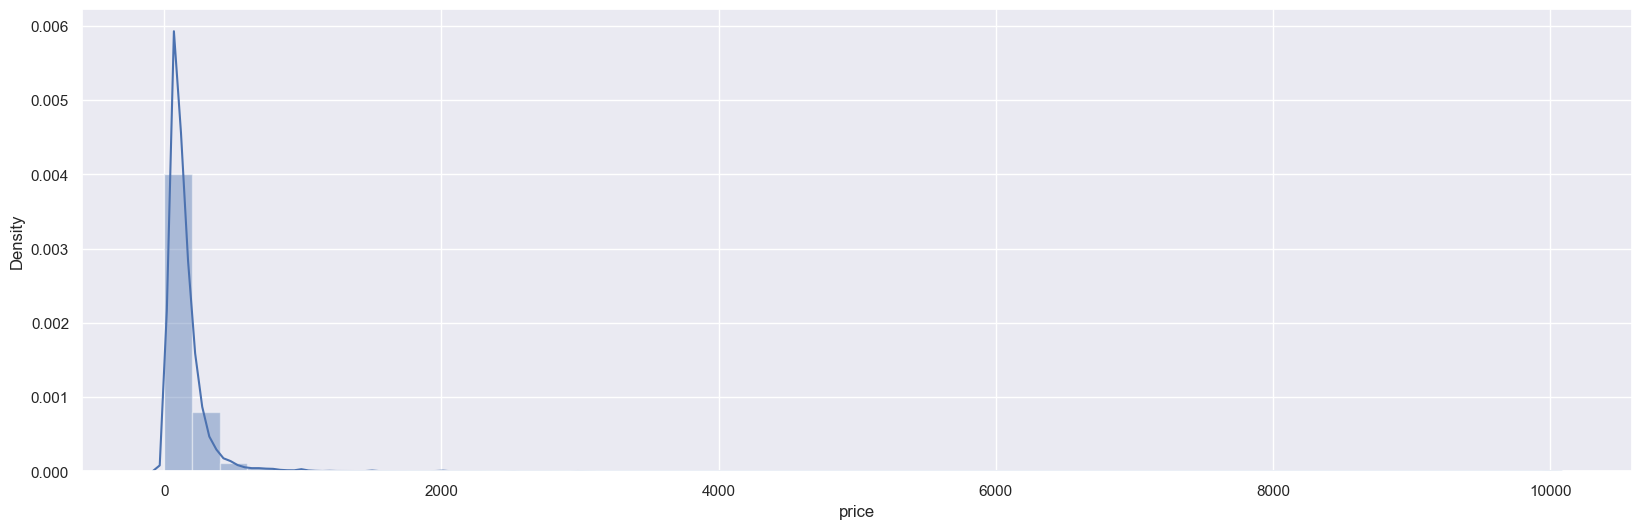

In [75]:
#distplot
sns.set(rc={"figure.figsize": (20, 6)})
sns.distplot(df_air['price'],hist=True)
plt.show()

In [76]:
#skewness and kurtosis
print("Skewness: %f" % df_air['price'].skew())
print("Kurtosis: %f" % df_air['price'].kurt())

Skewness: 19.118939
Kurtosis: 585.672879


- The skewness has value>1 it is highly skewed
- The kurtosis looks high, which indicates presence of outliers

Analysis numerical - numerical variables

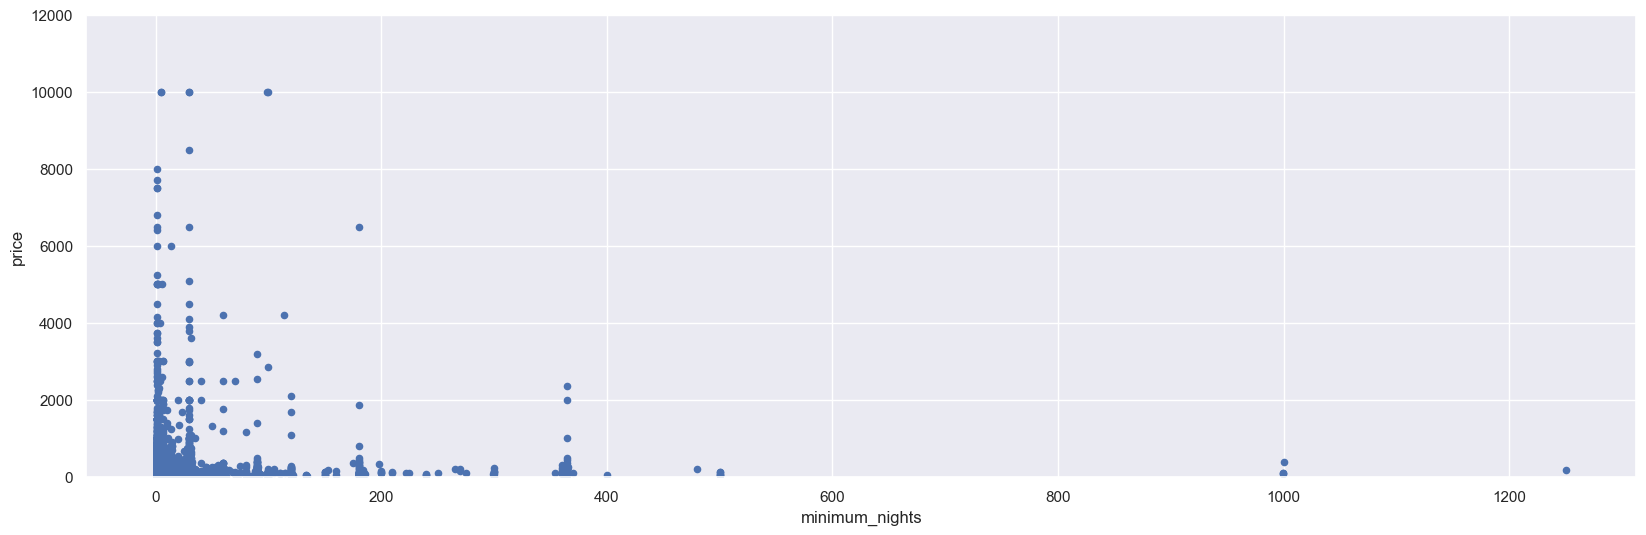

In [77]:
# price vs minimum_nights
var='minimum_nights'
data=pd.concat([df_air['price'],df_air[var]],axis=1)
data.plot.scatter(x=var,y='price',ylim=(0,12000))
plt.show()

- Many data points are clustured on 0 price range => existing anomaly in price.
- Existing outliers

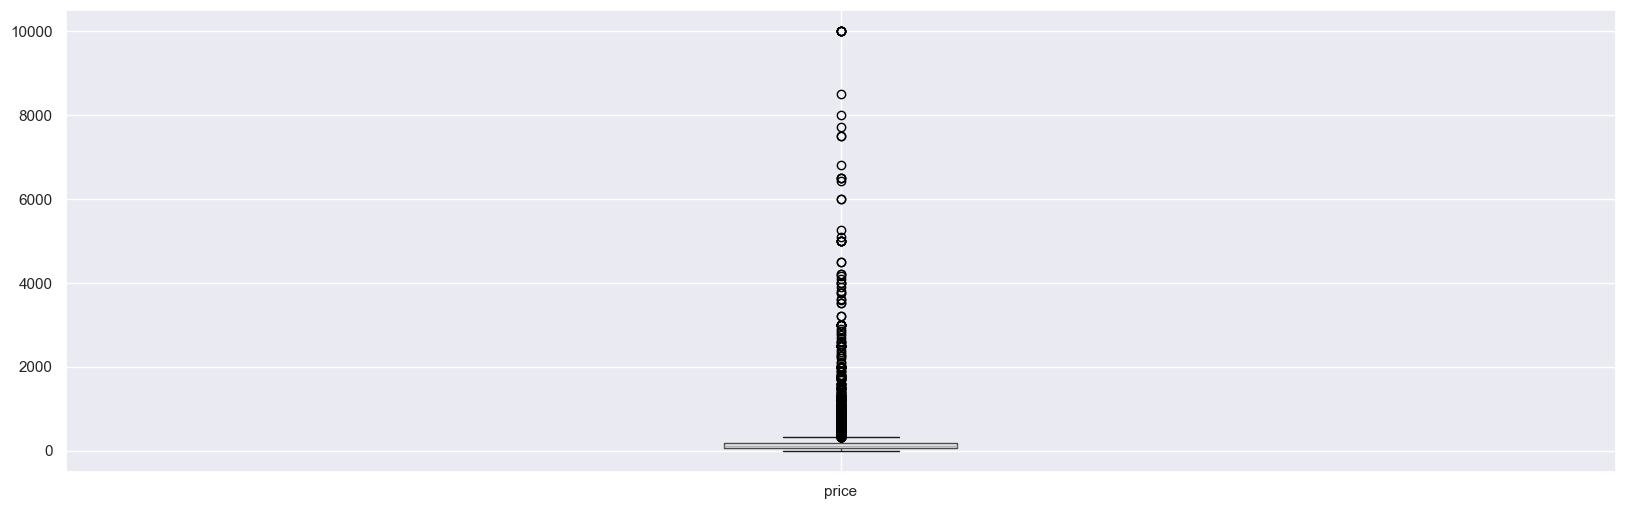

In [78]:
df_air.boxplot(column=['price'])
plt.show()


In [79]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [80]:
#checking null values!
df_air.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
availability_365_categories           0
minimum_night_categories              0
number_of_reviews_categories          0
price_categories                      0
dtype: int64

Missing values

In [81]:
#'name' and 'host_name' has very less missing values, maybe not that important in our analysis => replacing missing value to unknown & no_name respectively

df_air['name'].fillna('unknown',inplace=True)
df_air['host_name'].fillna('no_name',inplace=True)

In [82]:
df_air[['host_name','name']].isnull().sum()

host_name    0
name         0
dtype: int64

In [83]:
#'last_review' has many null values. Because it's not much required for our analysis as compared to number_of_reviews & reviews_per_month => drop this column
df_air= df_air.drop(['last_review'],axis=1)
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

In [84]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

In [85]:
#The reviews_per_month column containing null values=> can be replaced to 0 
df_air['reviews_per_month']=df_air['reviews_per_month'].replace(to_replace=np.nan,value=0).astype('int64')

In [86]:
df_air['reviews_per_month'].isnull().sum()

0

<span style='color: green;'> Observate the most no of listings in NYC

In [87]:
#top 5 name on Airbnb
listings_count_df=df_air['name'].value_counts()[:5].reset_index()
listings_count_df

,name,count
0,Hillside Hotel,18
1,Home away from home,17
2,unknown,16
3,New york Multi-unit building,16
4,Brooklyn Apartment,12


- It was found that Hillside Hotel had the most entries in all of New York City, followed by Home away from Home.

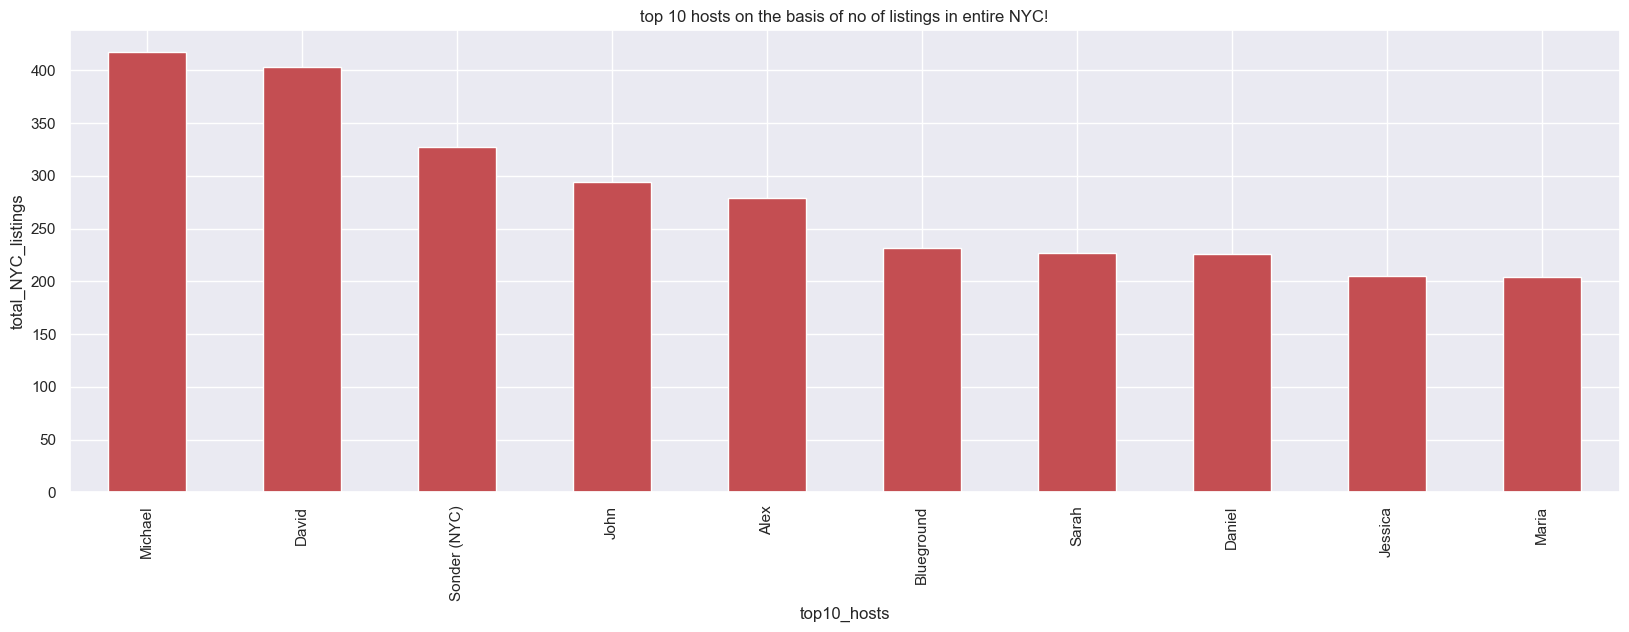

In [88]:
#top 10 hosts
top_10_hosts=df_air['host_name'].value_counts()[:10] 
top_10_hosts.plot(kind='bar',color='r')
plt.xlabel('top10_hosts')
plt.ylabel('total_NYC_listings')
plt.title('top 10 hosts on the basis of no of listings in entire NYC!')
plt.show()

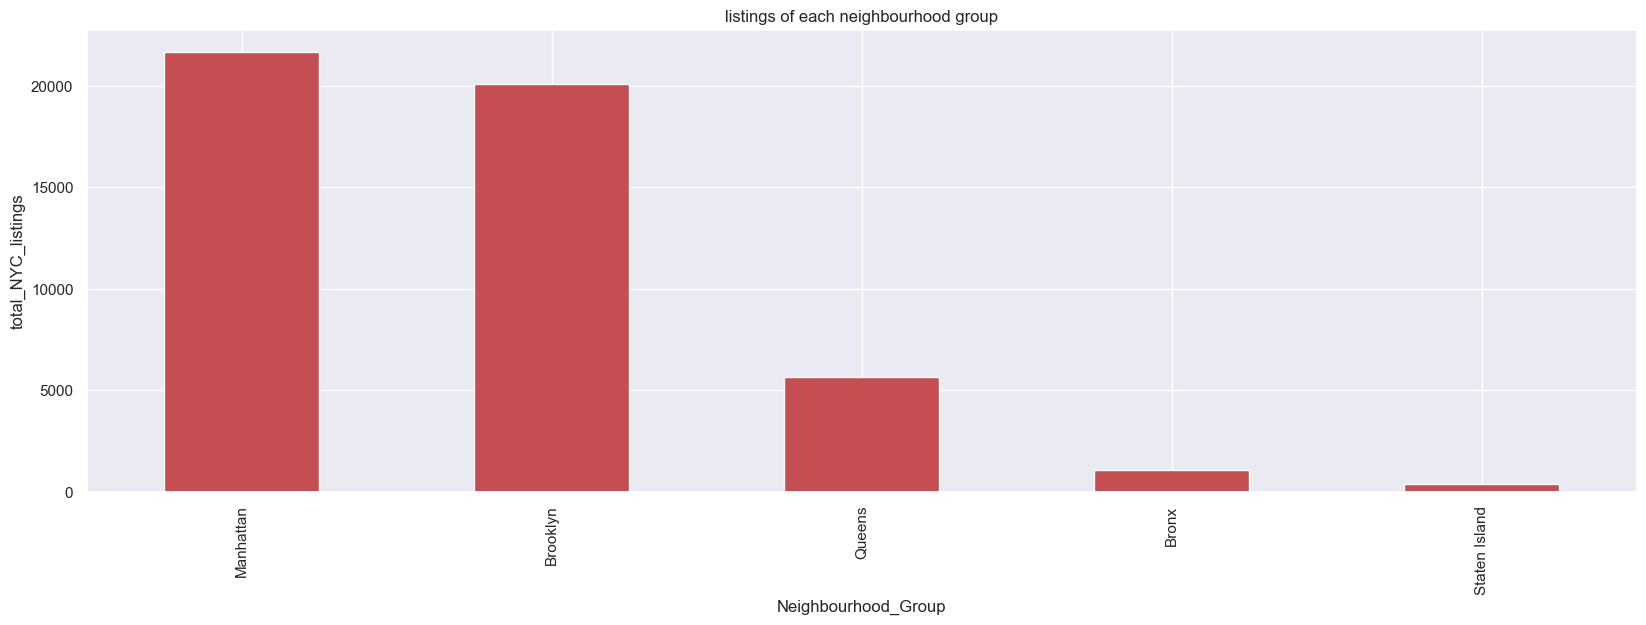

In [89]:
#listings of each neighbourhood group
df_air['neighbourhood_group'].value_counts().plot(kind='bar',color='r')
plt.xlabel('Neighbourhood_Group')
plt.ylabel('total_NYC_listings')
plt.title('listings of each neighbourhood group')
plt.show()

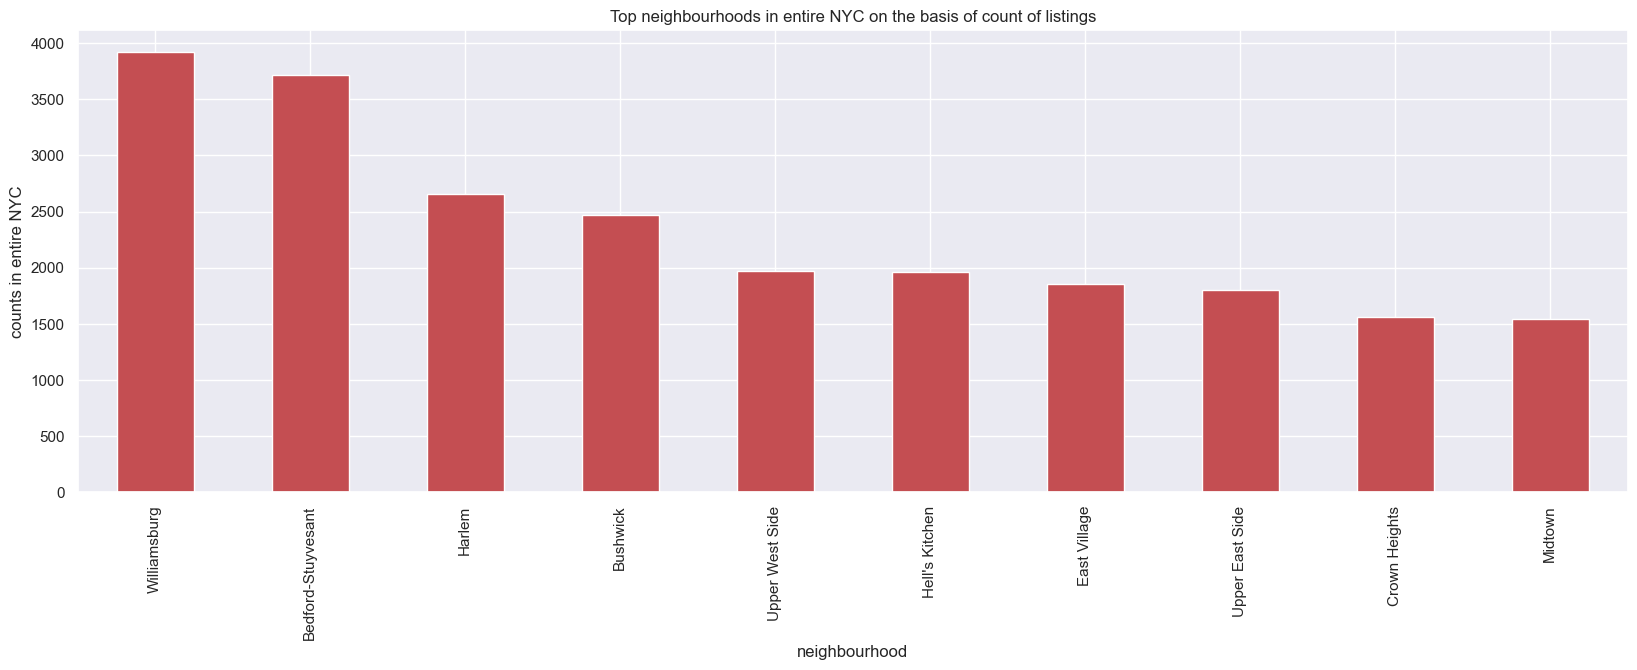

In [90]:
#top 10 neighbourhoods
top_10_neigbours= df_air['neighbourhood'].value_counts()[:10] 
top_10_neigbours.plot(kind='bar',color='r')
plt.xlabel('neighbourhood')
plt.ylabel('counts in entire NYC')
plt.title('Top neighbourhoods in entire NYC on the basis of count of listings')
plt.show()

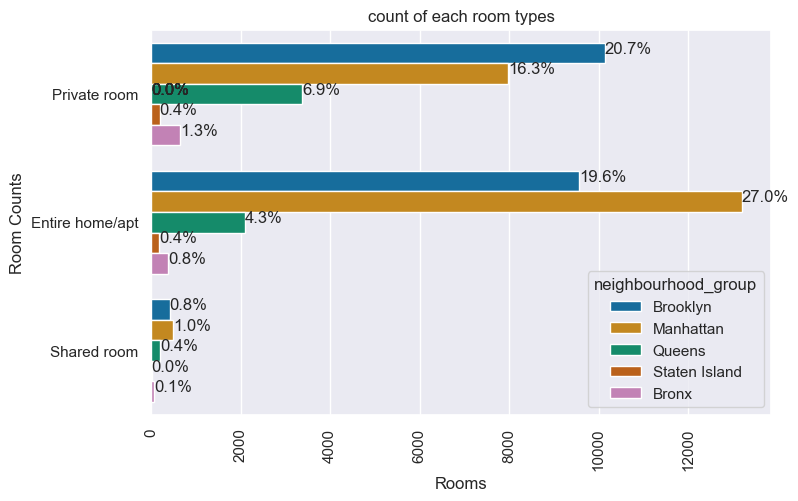

In [91]:
plt.rcParams['figure.figsize'] = (8, 5)
ax= sns.countplot(y='room_type',hue='neighbourhood_group',data=df_air,palette='colorblind')

total = len(df_air['room_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('count of each room types')
plt.xlabel('Rooms')
plt.xticks(rotation=90)
plt.ylabel('Room Counts')

plt.show()

- Private rooms are more prevalent in Brooklyn, comprising 20.7% of the total listed properties, followed by Manhattan at 16.3%. Queens accounts for 6.9% of the private room listings.
- Manhattan has more properties listed than any other areas. About 27% of all properties listed in Manhattan are Entire home/apt. Brooklyn comes in second with about 19.6%.
- The total number of shared rooms listed on Airbnb is quite limited, with very few available in Staten Island and the Bronx, where shared rooms are negligible or extremely rare.

<span style='color: green;'> Analyze the distribution of listings with availability

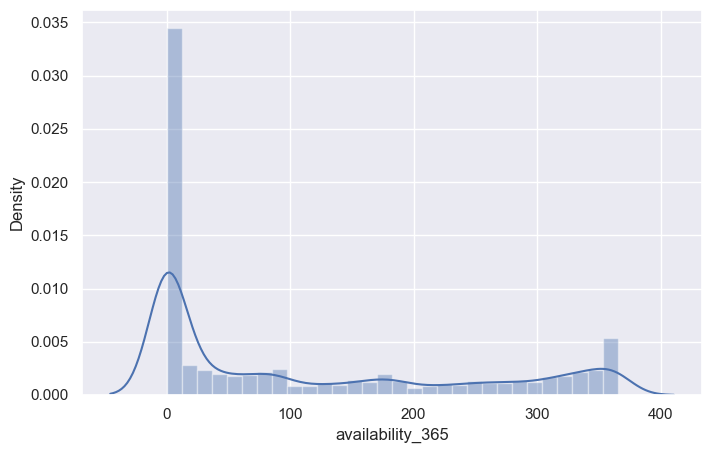

In [92]:
sns.distplot(df_air['availability_365'])
plt.show()

- Uniform Distribution: Availability values are evenly distributed from 0 to 370. <br>
- Right Skewness: The skewness indicates a moderate rightward tilt, implying some listings have significantly higher availability than others.

<span style='color: green;'>Reviews per month distribution as per listings 

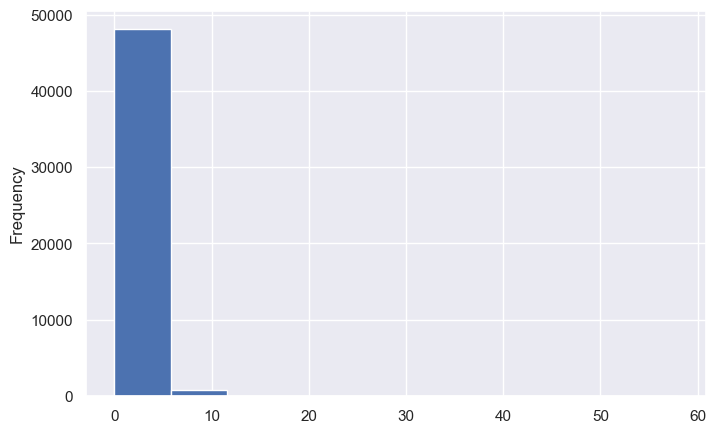

In [93]:
df_air['reviews_per_month'].plot.hist()
plt.show()

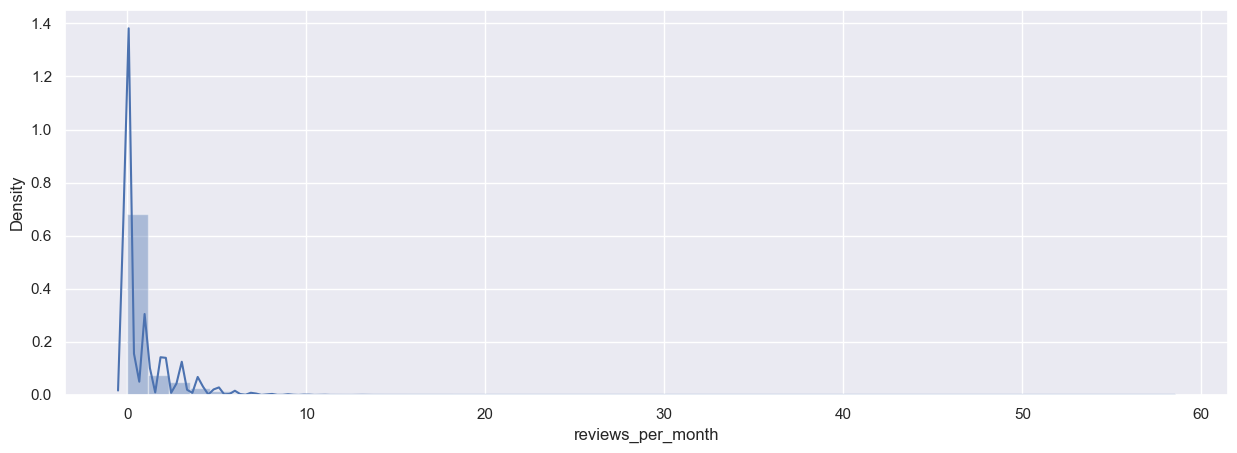

In [94]:
fig, ax = plt.subplots(figsize=(15,5))
sns.distplot(df_air['reviews_per_month'])
plt.show()

- Distribution Shape: Positively skewed with longer tails, indicating the presence of outliers. <br>
- Review Range: Monthly reviews primarily range from 0 to 10, with some listings reaching up to 60 reviews.

Handling the outliers

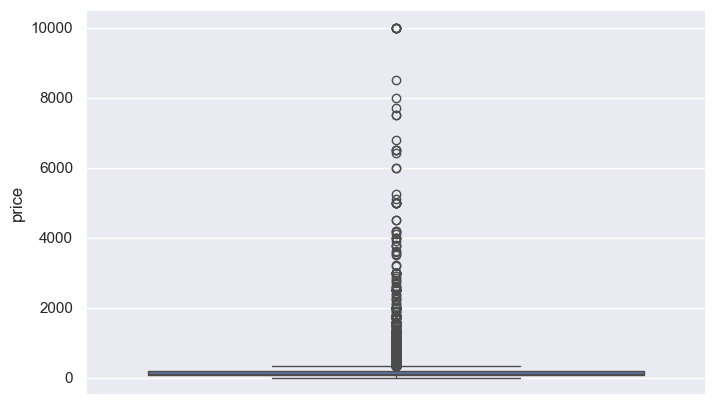

In [95]:
sns.boxplot(df_air['price'])
plt.show()

In [96]:
#using quantile approach to remove outliers
min_threshold,max_threshold= df_air.price.quantile([0.01,0.999])
min_threshold,max_threshold

(30.0, 3000.0)

In [97]:
df_air_pnw= df_air[(df_air.price>min_threshold)&(df_air.price<max_threshold)]
df_air_pnw

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0,6,365,very High,very Low,very Low,very Low
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0,2,355,very High,very Low,very Low,very Low
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,1,365,very High,Low,Low,Low
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4,1,194,Medium,very Low,very Low,very Low
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0,1,0,very Low,very High,Medium,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,2,9,Low,Low,Low,Low
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,2,36,Low,Medium,Low,Low
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,1,27,Low,very High,Medium,Medium
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,6,2,Low,very Low,very Low,very Low


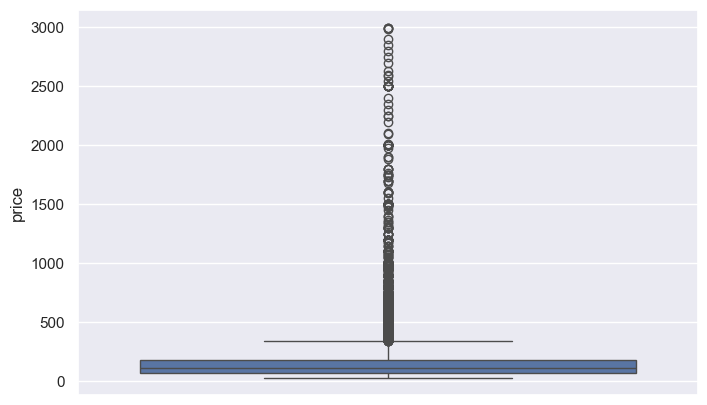

In [98]:
sns.boxplot(df_air_pnw['price'])
plt.show()

Still existing outlier on price=> trying using IQR

In [99]:
Q1 = df_air['price'].quantile(0.25)
Q3 = df_air['price'].quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)


69.0
175.0
106.0


In [100]:
#Removing using IQR 
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 
 return lower_range,upper_range

In [101]:
lower_bound,upper_bound = outlier_treatment(df_air['price'])

In [102]:
df_air_pnw1 = df_air[(df_air.price>lower_bound) & (df_air.price<upper_bound)]
df_air_pnw1

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0,6,365,very High,very Low,very Low,very Low
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0,2,355,very High,very Low,very Low,very Low
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,1,365,very High,Low,Low,Low
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4,1,194,Medium,very Low,very Low,very Low
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0,1,0,very Low,very High,Medium,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,2,9,Low,Low,Low,Low
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,2,36,Low,Medium,Low,Low
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,1,27,Low,very High,Medium,Medium
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,6,2,Low,very Low,very Low,very Low


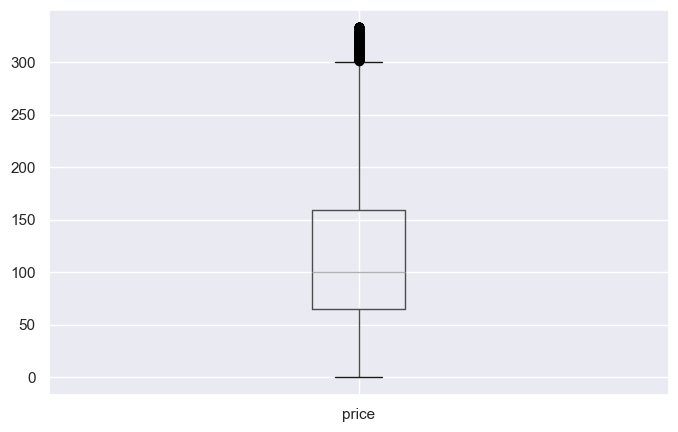

In [103]:
df_air_pnw1.boxplot(column='price')
plt.show()

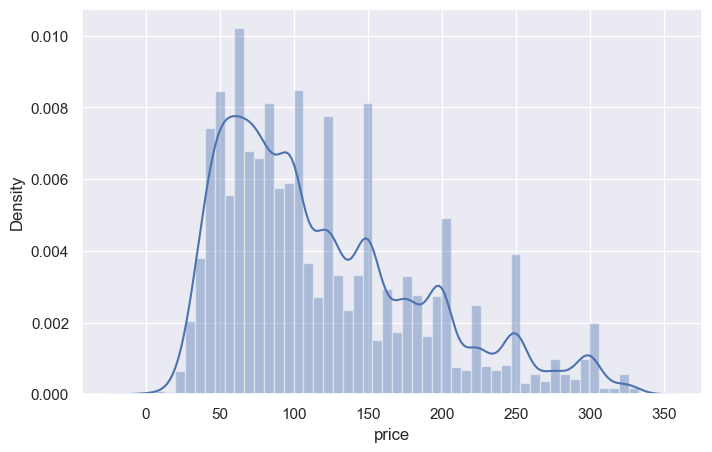

In [104]:
#check for the distribution after removing outlier
sns.distplot(df_air_pnw1['price'])
plt.show()

In [105]:
df_air_pnw1.neighbourhood_group.value_counts(normalize= True) * 100

neighbourhood_group
Manhattan        42.469184
Brooklyn         42.281894
Queens           12.123786
Bronx             2.330241
Staten Island     0.794895
Name: proportion, dtype: float64

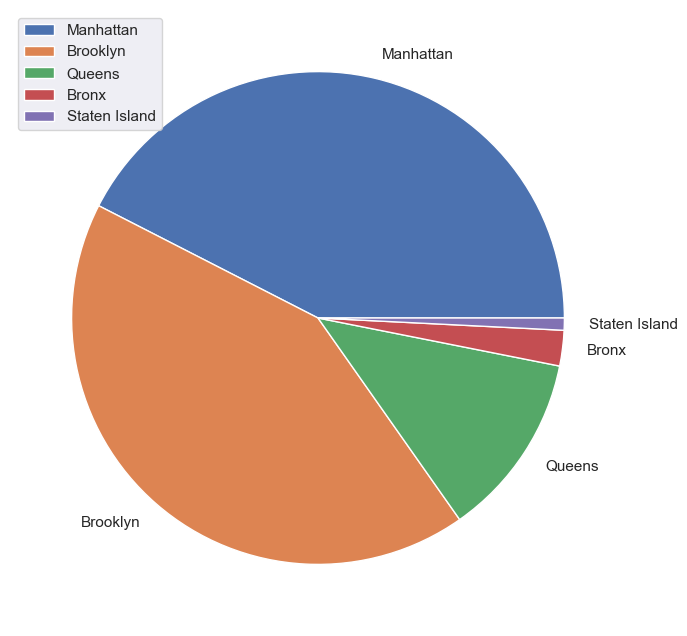

In [106]:
plt.figure(figsize=(8,8))
plt.pie(x = df_air_pnw1.neighbourhood_group.value_counts(normalize= True) * 100,labels = df_air_pnw1.neighbourhood_group.value_counts(normalize= True).index)
plt.legend()
plt.show()

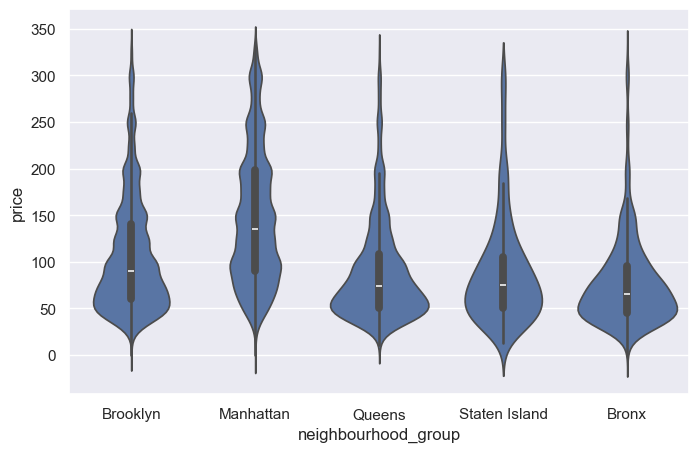

In [107]:
#the distribution of price and neighbourhood groups
ax= sns.violinplot(x='neighbourhood_group',y='price',data=df_air_pnw1)
plt.show()

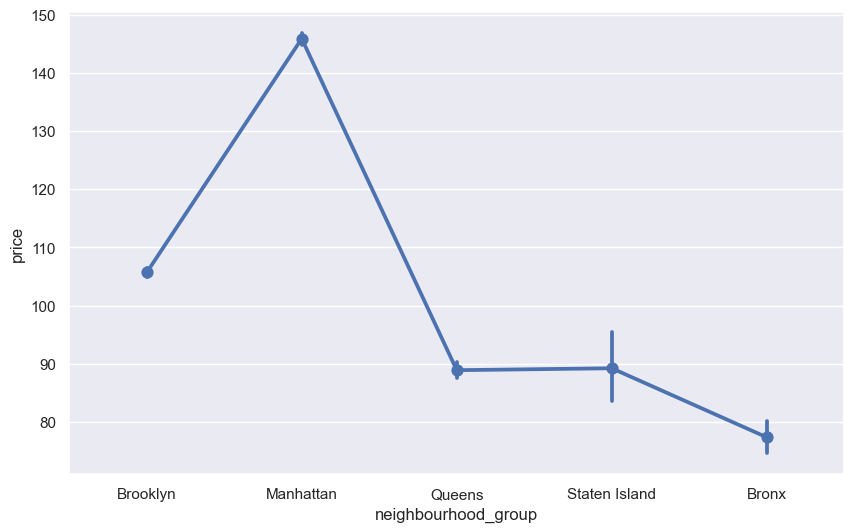

In [108]:
#the average price each neighbourhood groups
plt.figure(figsize=(10, 6))
sns.pointplot(x = 'neighbourhood_group', y='price', data=df_air_pnw1, estimator='mean')
plt.show()

As expected, Manhattan remains the most expensive area, with average listing prices exceeding $140. Brooklyn follows, with an average price of around $80. Queens, Staten Island and Bronx have similar average prices for their listings, indicating a more affordable market compared to Manhattan and Brooklyn.

<span style='color: green;'> Deep dive into cost of living

In [109]:
#top 5 most expensive 
df_air_pnw.nlargest(5,'price')[['name','neighbourhood_group','neighbourhood','host_name','room_type']]

,name,neighbourhood_group,neighbourhood,host_name,room_type
38498,"LUXURIOUS 5 bedroom, 4.5 bath home",Manhattan,Upper West Side,Lisa,Entire home/apt
48304,Next to Times Square/Javits/MSG! Amazing 1BR!,Manhattan,Hell's Kitchen,Rogelio,Entire home/apt
46533,Amazing Chelsea 4BR Loft!,Manhattan,Chelsea,Viberlyn,Entire home/apt
30824,Designer's Beautiful 2BR Apartment in NOLITA/SOHO,Manhattan,Nolita,Ilo And Richard,Entire home/apt
22992,"Modern Townhouse for Photo, Film & Daytime Events",Manhattan,Upper West Side,Lanie,Entire home/apt


In [110]:
#top 5 most cheapest
df_air_pnw.sort_values(by='price',ascending=True)[['name','neighbourhood_group','neighbourhood','host_name','room_type']][:5]

,name,neighbourhood_group,neighbourhood,host_name,room_type
12516,cute and cozy room in brooklyn,Brooklyn,Bedford-Stuyvesant,Ornella,Private room
7864,Comfortable and Large Room,Brooklyn,Flatbush,Kay,Private room
29967,Large bed room share bathroom,Queens,Elmhurst,Cha,Private room
39100,15 minutes From Times Square!!,Manhattan,Washington Heights,Ari,Private room
28700,Cozy room in Loft Apartment - Brooklyn,Queens,Ridgewood,Estefani,Private room


- top 5 most expensive listings belongs to Manhattan (being the most expensive place of living in NYC) <br>
- top 5 cheapest listings mostly comes from Brooklyn, Queens and all are private rooms 

<span style='color: green;'>Top 5 neighbourhoods with respect to average price/day

In [111]:
# the neighbourhoods with listings having highest average price/day in each neighbourhood groups of NYC
df_ngrp= df_air_pnw.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index()
top_neigh_each= df_ngrp.loc[df_ngrp.groupby('neighbourhood_group')['price'].idxmax()].sort_values(by='price',ascending=False)
top_neigh_each

,neighbourhood_group,neighbourhood,price
188,Staten Island,Fort Wadsworth,800.000000
88,Brooklyn,Sea Gate,487.857143
34,Bronx,Riverdale,442.090909
121,Manhattan,Tribeca,410.531429
163,Queens,Neponsit,274.666667


Fort Wadsworth and Sea Gate are the top neighborhoods from Staten Island and Brooklyn, respectively.<br>
Riverdale represents the Bronx, while Tribeca is a premier area in Manhattan.<br>
Neponsit is noted as a top neighborhood in Queens.

<span style='color: green;'> The expensive listings in each neighbourhood groups & their respective hosts

In [112]:
costliest_df= df_air_pnw.loc[df_air_pnw.groupby(['neighbourhood_group'])['price'].idxmax()][['name','neighbourhood_group','host_name','price']]
costliest_df.sort_values(by='price',ascending=False)

,name,neighbourhood_group,host_name,price
38498,"LUXURIOUS 5 bedroom, 4.5 bath home",Manhattan,Lisa,2999
29665,Park Place Townhouse by (Hidden by Airbnb),Brooklyn,Sally,2626
42680,Majestic Mansion LifeStyle :),Queens,Shah,2600
24477,"""The luxury of Comfort""",Bronx,Kathy,2500
45572,Central Hall Colonial with Free Parking Bus EXP NY,Staten Island,Anastasios,1250


Manhattan Listing: LUXURIOUS 5 bedroom, 4.5 bath home, hosted by Lisa.<br>
Brooklyn Listing: Park Place Townhouse by (Hidden by Airbnb), hosted by Sally.

<span style='color: green;'>The cheapest listings in each neighbourhood groups & their respective hosts

In [113]:
cheapest_df= df_air_pnw.loc[df_air_pnw.groupby('neighbourhood_group')['price'].idxmin()][['neighbourhood_group','name','host_name','price']]
cheapest_df.sort_values(by='price',ascending=True)

,neighbourhood_group,name,host_name,price
2887,Brooklyn,Amazing Spacious Room,Lord Daniel,31
7431,Manhattan,Cozy room right on BROADWAY - Washington Heights,Nga,31
6615,Queens,"Super Clean, Quiet & Spacious Room",Troy,31
30312,Staten Island,Nice room near SI Ferry \n15 minutes by car.,Sara I,31
3889,Bronx,"A Simple, Calm Space",Août,32


the cheapest listings across various low-cost neighborhoods tend to cluster within the same price bracket.

<span style='color: green;'> Room_types vs price on different neighbourhood groups

In [114]:
df_air_pnw['room_type'].unique() #unique rooms available throughout NYC

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

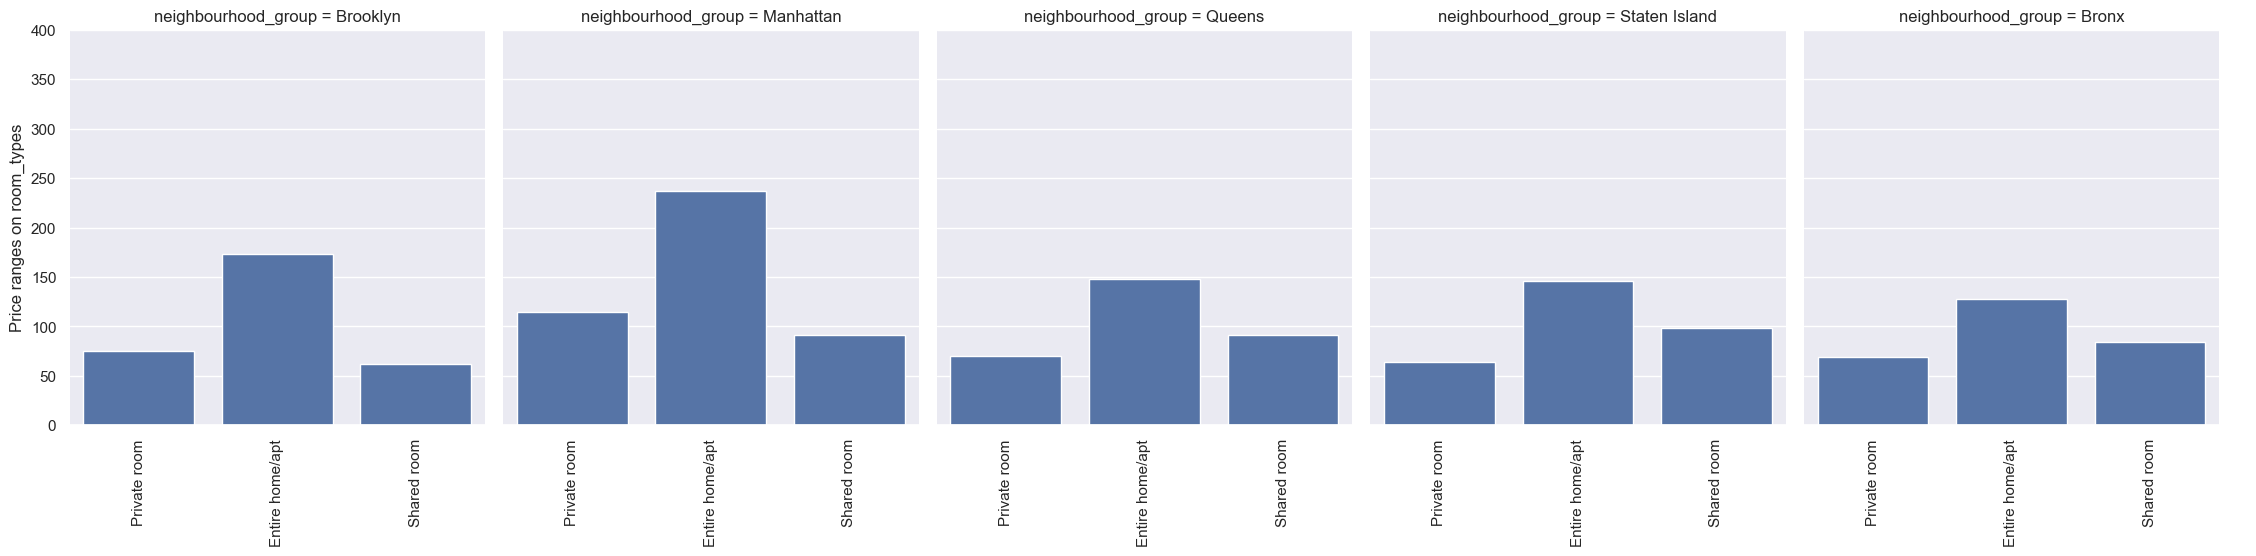

In [115]:
#room_type vs price
g = sns.catplot(x="room_type", y="price", col="neighbourhood_group",
                data=df_air_pnw, saturation=.8,
                kind="bar",ci=None,  aspect=.9)
(g.set_axis_labels("", "Price ranges on room_types")
  .set_xticklabels(["Private room", "Entire home/apt", "Shared room"],rotation=90)
  .set(ylim=(0, 400))
  .despine(left=True)) 
plt.show()

Room Type Popularity: Entire homes/apartments are the most sought-after, indicating a preference for privacy and space.<br>
Manhattan has the highest price for room types with Entire home/apt ranging to nearly 240 USD/night, followed by Private room with 110 USD/night. And it's obvious being the most expensive place to live

<span style='color: green;'> On an average for how many nights people stayed in each room_types

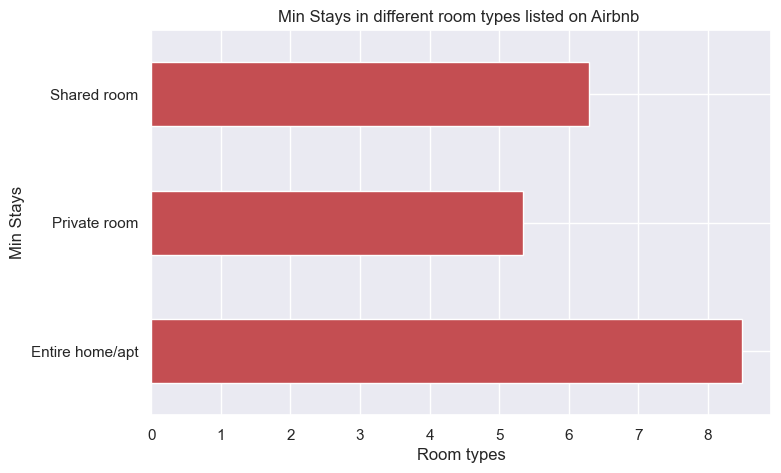

In [116]:
# min_night= df_air_pnw['room_type']
df_air_pnw.groupby('room_type')['minimum_nights'].mean().plot(kind='barh',color='r')
plt.title('Min Stays in different room types listed on Airbnb ')
plt.xlabel('Room types')
plt.ylabel('Min Stays')
plt.show()

People generally prefer staying in an entire home or apartment, with an average duration of over 8 nights. In contrast, guests who choose shared rooms typically stay for an average of 6 to 7 nights.

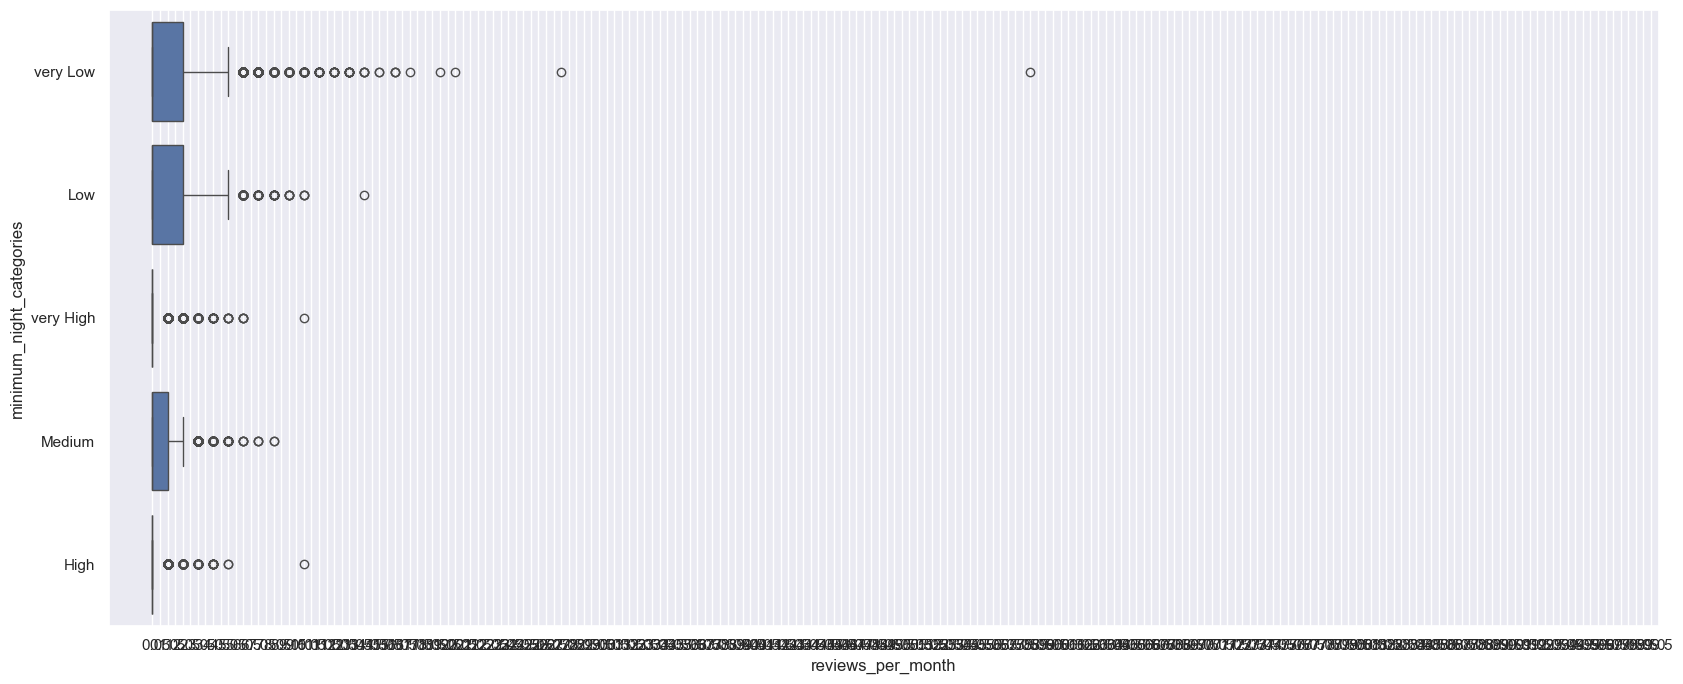

In [131]:
plt.figure(figsize=(20,8))
sns.boxplot(data = df_air_pnw, y = 'minimum_night_categories' ,x = 'reviews_per_month')
plt.xticks(np.arange(0,100,.5))
plt.show()

<span style='color: green;'> Explore the reviews of listings

In [117]:
#top 10 most reviewed listings
top10_reviewed_listings= df_air.nlargest(10,'reviews_per_month')
top10_reviewed_listings[['name','reviews_per_month','neighbourhood_group']]

,name,reviews_per_month,neighbourhood_group
42075,Enjoy great views of the City in our Deluxe Room!,58,Manhattan
42076,Great Room in the heart of Times Square!,27,Manhattan
38870,Lou's Palace-So much for so little,20,Queens
27287,JFK Comfort.5 Mins from JFK Private Bedroom & Bath,19,Queens
28651,JFK 2 Comfort 5 Mins from JFK Private Bedroom,17,Queens
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,16,Queens
22469,Cute Tiny Room Family Home by LGA NO CLEANING FEE,16,Queens
29628,JFK 3 Comfort 5 Mins from JFK Private Bedroom,16,Queens
36238,“For Heaven Cakes”,15,Queens
40036,6 Minutes From JFK Airport Cozy Bedroom,15,Queens


Here are the listings with the highest number of reviews: the top one is "Enjoy great views of the City in our Deluxe Room!" with 58 reviews per month, followed by "Great Room in the heart of Times Square!" with 27 reviews per month. Both of the top listings are located in Manhattan, making them ideal for a comfortable stay, though their prices are on the higher side.

<span style='color: green;'>Examine how monthly reviews differ by room types across each neighborhood group

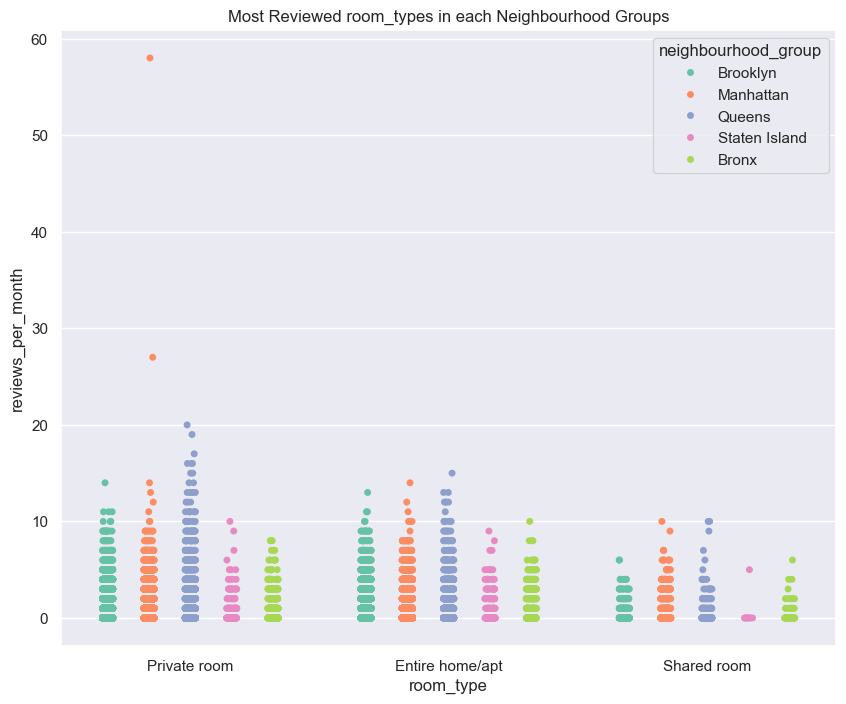

In [118]:
f,ax = plt.subplots(figsize=(10,8))
ax= sns.stripplot(x='room_type',y='reviews_per_month',hue='neighbourhood_group',dodge=True,data=df_air,palette='Set2')
ax.set_title('Most Reviewed room_types in each Neighbourhood Groups')
plt.show()

Private rooms received the highest number of reviews per month, with Manhattan leading at over 50 reviews monthly, followed closely by other areas. For the Entire home/apt category, both Manhattan and Queens received the most reviews. In contrast, shared rooms garnered significantly fewer reviews, primarily from Staten Island, followed by the Bronx.

<span style='color: green;'>Identify the top 10 hosts based on their monthly review counts

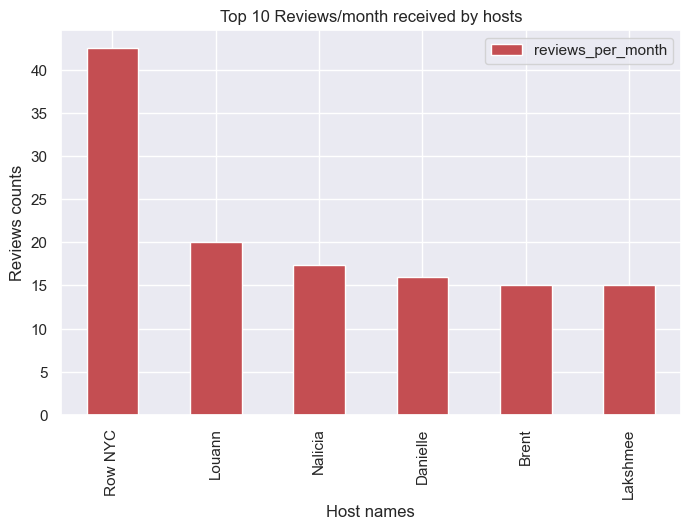

In [119]:
#there are cases where same hosts are hosting multiple properties in same/different areas.
reviews_df=top10_reviewed_listings.groupby('host_name')['reviews_per_month'].mean() 
reviews_df=reviews_df.reset_index().sort_values(by='reviews_per_month',ascending=False)
reviews_df.plot(x='host_name',y='reviews_per_month',kind='bar',color='r')
plt.ylabel('Reviews counts')
plt.xlabel('Host names')
plt.title('Top 10 Reviews/month received by hosts')
plt.show()

Row NYC is the most reviewed host, averaging over 40 reviews per month.

<span style='color: green;'> Hosts with the highest number of listings in NYC (based on the count of host listings)

In [120]:
host_with_most_listings= df_air.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].sum().reset_index()
largest_listings_df= host_with_most_listings.nlargest(10,'calculated_host_listings_count')
largest_listings_df

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,106929
1834,Blueground,Manhattan,53360
7275,Kara,Manhattan,14669
6540,Jeremy & Laura,Manhattan,9216
13216,Sonder,Manhattan,9216
2901,Corporate Housing,Manhattan,8281
7480,Kazuya,Queens,8137
7546,Ken,Manhattan,7500
11399,Pranjal,Manhattan,4225
9856,Mike,Manhattan,2824


Sonder (NYC) tops the list for the most expensive neighborhood group in NYC, with approximately 106,929 properties listed, followed by Blueground and Kara. All three hosts have their listings in Manhattan.


<span style='color: green;'> Check for hosts with most listings in each neighbourhood group

In [121]:
hosts_df=host_with_most_listings.groupby(['neighbourhood_group'])['calculated_host_listings_count'].transform(max) == host_with_most_listings['calculated_host_listings_count']
host_with_most_listings[hosts_df].sort_values(by='calculated_host_listings_count',ascending=False)

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,106929
7480,Kazuya,Queens,8137
14432,Vida,Brooklyn,2705
14435,Vie,Bronx,169
685,Amarjit S,Staten Island,64


Sonder (NYC), Kazuya, Vida, Vie, and Amarjit are the hosts with the highest number of listings in each neighborhood group throughout all of NYC

<span style='color: green;'> Room_types and their relation with availability in different neighbourhood groups

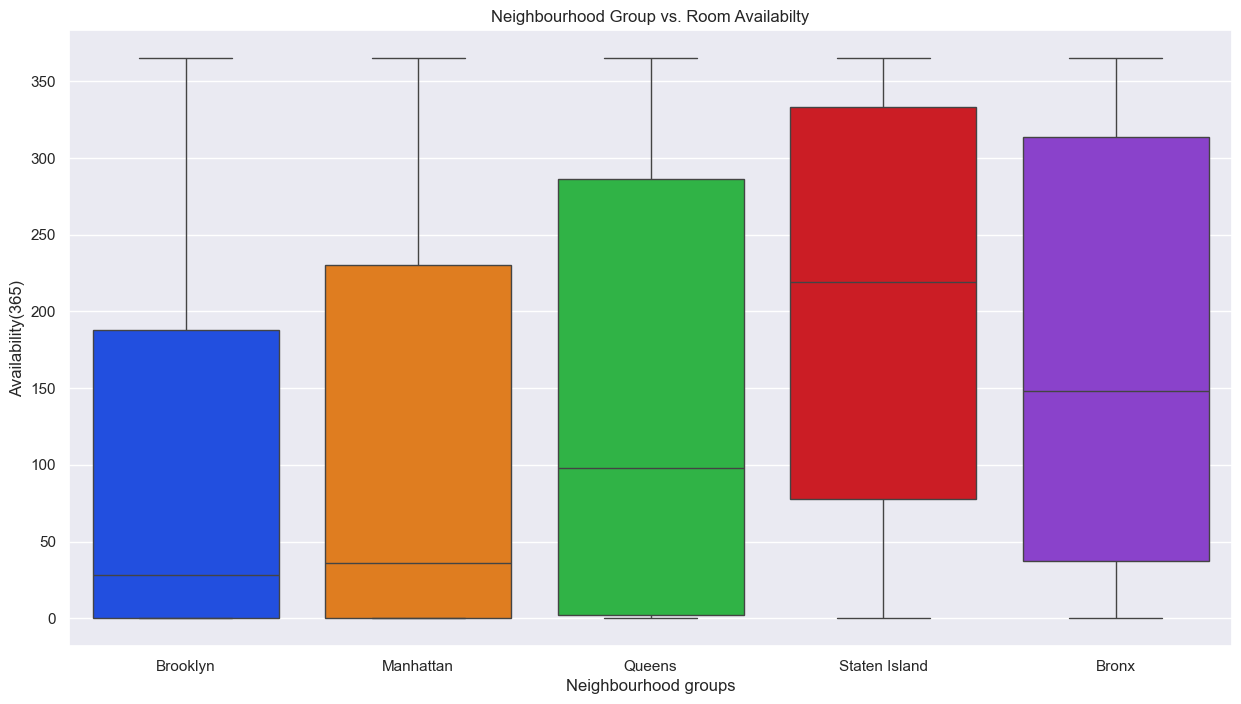

In [122]:
f,ax = plt.subplots(figsize=(15,8))
ax=sns.boxplot(x='neighbourhood_group',y='availability_365',data=df_air,palette="bright")
plt.title("Neighbourhood Group vs. Room Availabilty")
plt.xlabel('Neighbourhood groups')
plt.ylabel('Availability(365)')
plt.show()

From the categorical box plot, we can infer that listings in Staten Island demonstrate higher availability throughout the year, often exceeding 300 days. On average, these listings are available for about 210 days per year. Following Staten Island, the Bronx exhibits an average availability of around 150 days for its listings each year.

<span style='color: green;'> Check latitude and longitude

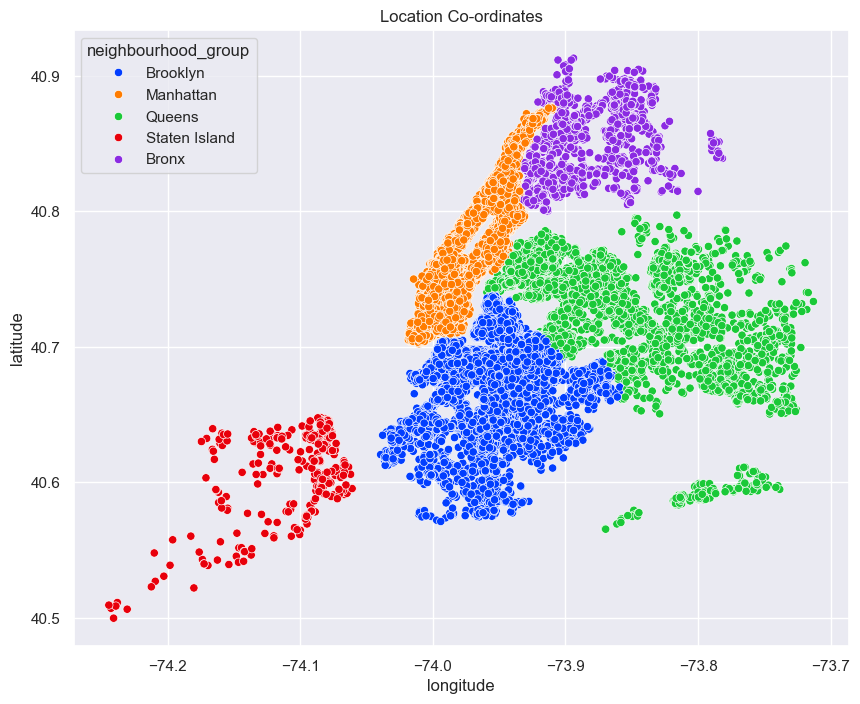

In [123]:
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(data=df_air_pnw, x="longitude", y="latitude",hue='neighbourhood_group',palette='bright')
ax.set_title('Location Co-ordinates')
plt.show()

<span style='color: green;'> Observe the type of rooms

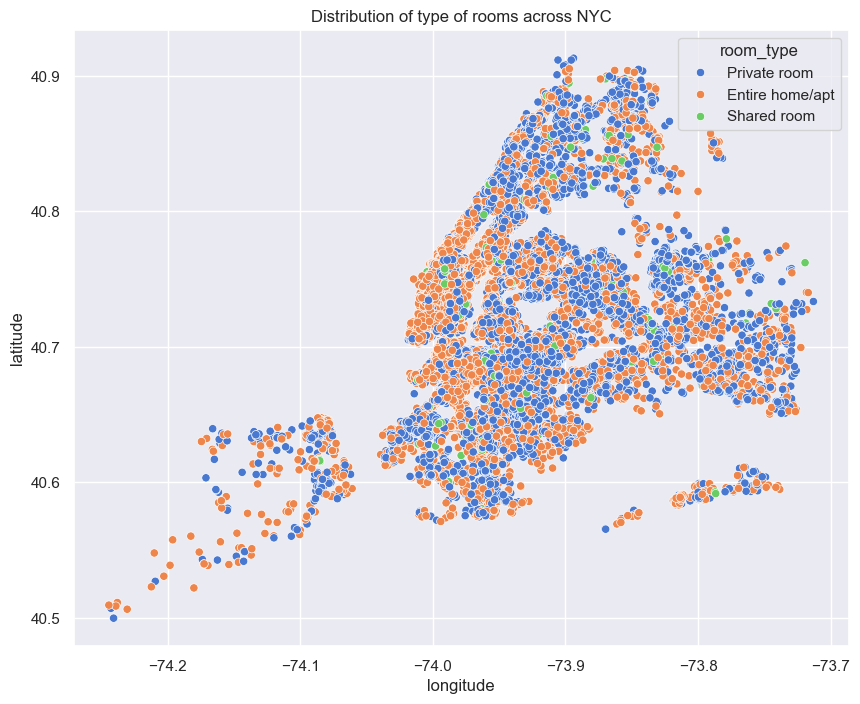

In [124]:
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(x=df_air_pnw.longitude, y=df_air_pnw.latitude,hue=df_air.room_type,palette='muted')
ax.set_title('Distribution of type of rooms across NYC')
plt.show()

The two scatterplots of latitude versus longitude indicate that there are significantly fewer Shared rooms available throughout NYC compared to Private rooms and Entire homes/apartments. <br>

90% of the listings on Airbnb consist of either private rooms or entire homes/apartments, with very few guests choosing shared rooms. Additionally, our previous analysis showed that guests primarily prefer these room types when seeking rentals on Airbnb.

We can also conclude that prices vary widely across Manhattan, which is the most expensive area to stay in NYC.

<span style='color: green;'> Observate the listings availability in a year throughout NYC

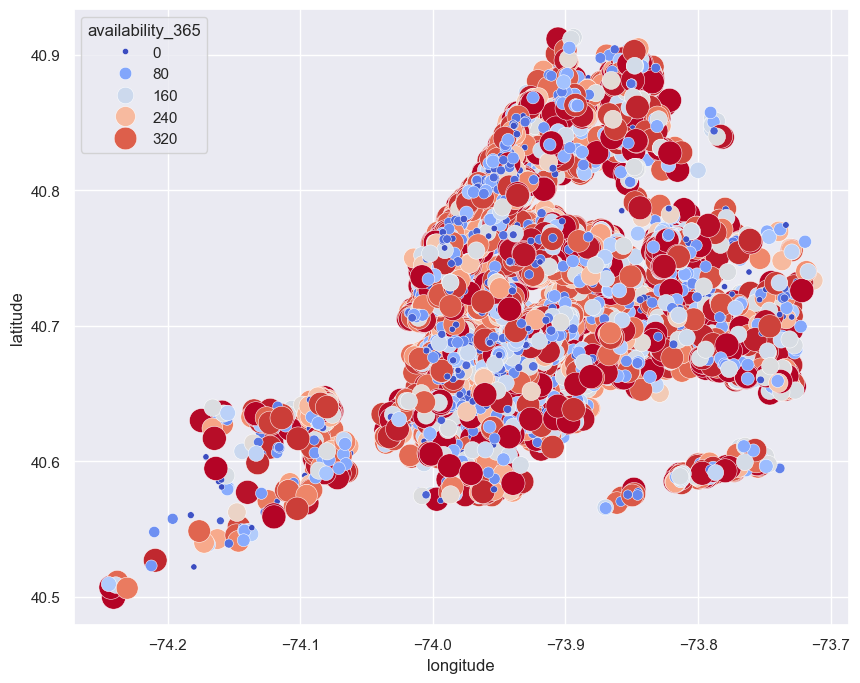

In [125]:
f, ax = plt.subplots(figsize=(10, 8))
ax=sns.scatterplot(data=df_air_pnw1,x='longitude', y='latitude', hue="availability_365",palette='coolwarm',size='availability_365',sizes=(20,300))
plt.show()

It appears that the Bronx and Staten Island have listings that are mostly available throughout the year, likely because their prices are lower compared to other boroughs like Manhattan, Brooklyn, and Queens.

